In [ ]:
Link Google Colab : 

In [32]:
!pip install -q kaggle

In [33]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [34]:
!cp kaggle.json ~/.kaggle

In [35]:
!chmod 600 ~/.kaggle/kaggle.json

In [36]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import sqrt
from scipy.stats import skew
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA

In [41]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [43]:
print(len(train.index))
print(len(train.columns))
print(len(test.index))
print(len(test.columns))

1460
81
1459
80


In [44]:
print(sum(train.isna().sum()))
print(sum(test.isna().sum()))

7829
7878


In [45]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [46]:
# 'melakukan pengecekan semua numeric collumn dengan collumn SalePrice yang dimana hanya 10 data [:10], dimana saleprice dengan saleprice adalah 100 persen korelasinya'
numeric_cols = train.select_dtypes(include= [np.number])
corr = numeric_cols.corr()
print('Most Correlated Feature with SalePrice'), print(corr['SalePrice'].sort_values(ascending = False),'\n')

Most Correlated Feature with SalePrice
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578

(None, None)

Text(0.5, 0, 'GrLivArea Living Area Square Feet')

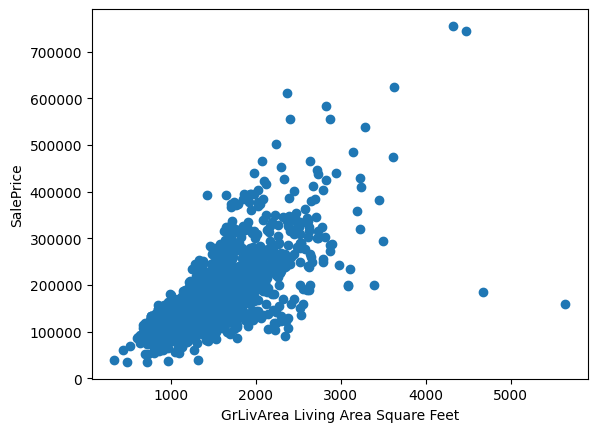

In [47]:
# melakukan pengecekkan outliers
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea Living Area Square Feet')

# Data Preprocessing

In [48]:
# Melakukan Penghapusan Terhadap Data Outliers
train = train[train['GrLivArea'] < 4500]

In [49]:
# Ngereplace Missing Value pada Train Data

train_percentage = train.isnull().sum() / train.shape[0] #shape[0] = col , #shape[1] = baris
print(train_percentage[train_percentage > 0.80])
train = train.drop(train_percentage[train_percentage > 0.80].index, axis = 1)

Alley          0.937586
PoolQC         0.995885
Fence          0.807270
MiscFeature    0.962963
dtype: float64


In [50]:
# Ngereplace Missing Value pada Test Data
test_percentage = test.isnull().sum() / test.shape[0] #shape[0] = col , #shape[1] = baris
print(test_percentage[test_percentage > 0.80])
test = test.drop(test_percentage[test_percentage > 0.80].index, axis = 1)

Alley          0.926662
PoolQC         0.997944
Fence          0.801234
MiscFeature    0.965045
dtype: float64


In [51]:
# Categorical Data to Numerical (Data Train)
le = preprocessing.LabelEncoder()

for name in train.columns:
  if train[name].dtypes == 'O':
    train[name] = train[name].astype(str)
    le.fit(train[name])
    train[name] = le.transform(train[name])

In [52]:
# Categorical Data to Numerical (Data Test)
le = preprocessing.LabelEncoder()

for name in test.columns:
  if test[name].dtypes == 'O': #'O' adalah penanda object maka diubah menjadi string terlebih dahulu
    test[name] = test[name].astype(str)
    le.fit(test[name])
    test[name] = le.transform(test[name])

In [53]:
for column in train.columns:
  null_vals = train.isnull().values
  a, b = np.unique(train.values[~null_vals], return_counts = 1)
  train.loc[train[column].isna(), column] = np.random.choice(a, train[column].isnull().sum(), p = b / b.sum())

# Splitting Dataset

In [54]:
X = train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch']]
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
lr = linear_model.LinearRegression()

In [56]:
model = lr.fit(X_train, y_train)

In [57]:
predictions = model.predict(X_test)

In [58]:
print('Root Mean Squared Error Value : ',sqrt(mean_squared_error(y_test, predictions)))
print('Mean Squared Error Value : ', mean_squared_error(y_test, predictions))
print('Mean Absolute Error Value : ', mean_absolute_error(y_test, predictions))

r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

Root Mean Squared Error Value :  30278.443288950617
Mean Squared Error Value :  916784128.0021987
Mean Absolute Error Value :  21662.67540290404
R² Score: 0.8423046370021234
